<a href="https://colab.research.google.com/github/Zakaal/PCVK_Ganjil_24_25/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Nama : Mochammad Zakaro Al Fajri**

**NIM : 2241720175**

**Kelas : TI - 3F**

**No Absen : 14**

---



# TUGAS PRAKTIKUM - MODUL 6

1. Import folder yang ada di Drive Anda

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import glob

3. Buatlah histogram citra menggunakan gambar lena

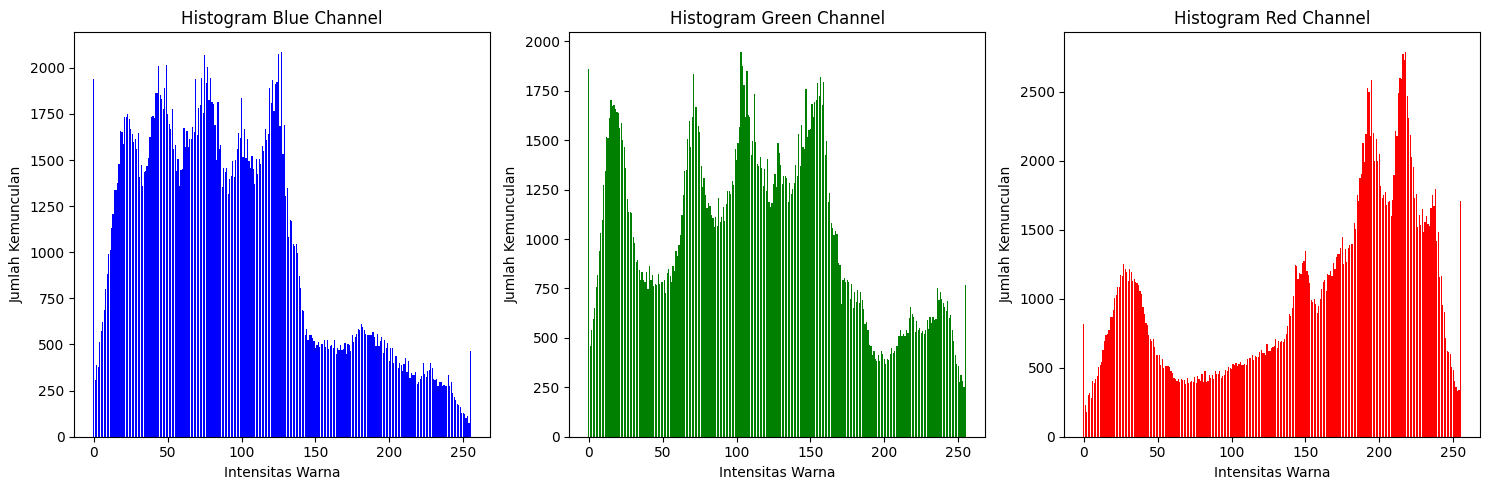

In [34]:
image = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
b, g, r = cv.split(image)

def create_histogram(channel):
  histogram = [0] * 256
  for row in channel:
    for pixel in row:
      histogram[pixel] += 1
  return histogram

b_histogram = create_histogram(b)
g_histogram = create_histogram(g)
r_histogram = create_histogram(r)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(256), b_histogram, color='blue')
plt.title('Histogram Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(1, 3, 2)
plt.bar(range(256), g_histogram, color='green')
plt.title('Histogram Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(1, 3, 3)
plt.bar(range(256), r_histogram, color='red')
plt.title('Histogram Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.show()


4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

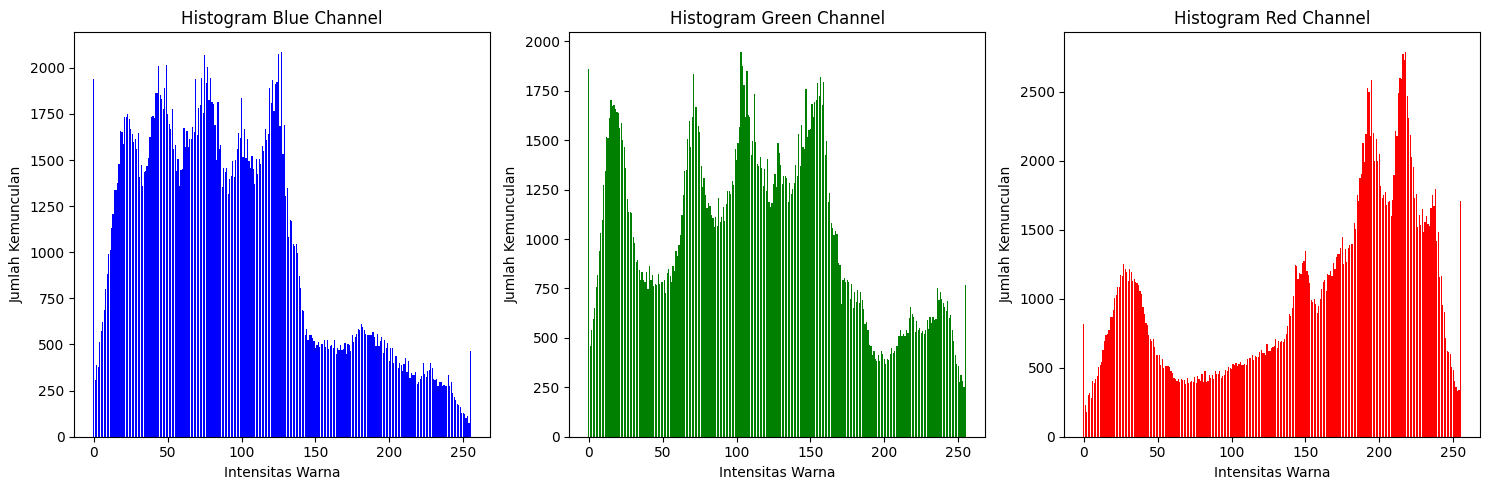

In [35]:
image = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
b, g, r = cv.split(image)

# Menghitung histogram menggunakan numpy
b_histogram, _ = np.histogram(b, bins=256, range=(0, 256))
g_histogram, _ = np.histogram(g, bins=256, range=(0, 256))
r_histogram, _ = np.histogram(r, bins=256, range=(0, 256))

# Menggambar histogram
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(256), b_histogram, color='blue')
plt.title('Histogram Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(1, 3, 2)
plt.bar(range(256), g_histogram, color='green')
plt.title('Histogram Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(1, 3, 3)
plt.bar(range(256), r_histogram, color='red')
plt.title('Histogram Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization

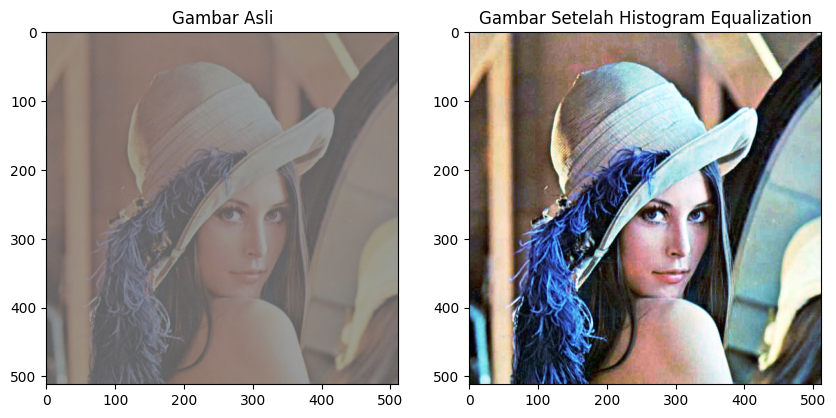

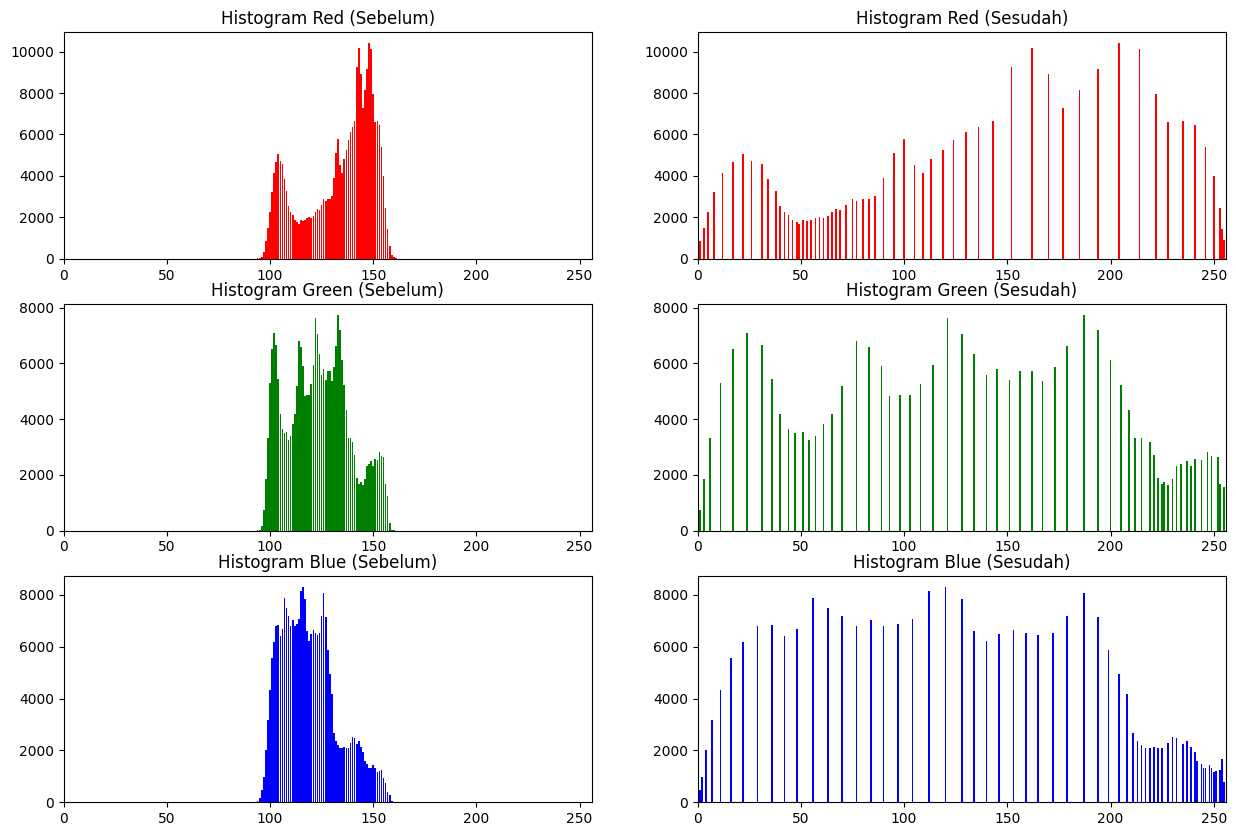

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

# Konversi ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Histogram Equalization untuk setiap channel warna
r, g, b = cv2.split(img_rgb)

r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# Menggabungkan channel warna yang sudah di-equalize
img_eq = cv2.merge((r_eq, g_eq, b_eq))

# Menampilkan gambar sebelum dan sesudah histogram equalization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(img_eq)
plt.title('Gambar Setelah Histogram Equalization')
plt.show()

# Menampilkan histogram sebelum dan sesudah untuk setiap channel warna
colors = ('r', 'g', 'b')
labels = ('Red', 'Green', 'Blue')

plt.figure(figsize=(15, 10))

for i, color in enumerate(colors):
    # Histogram sebelum equalization
    plt.subplot(3, 2, 2*i + 1)
    histr = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.bar(range(256), histr.ravel(), color=color)  # Menggunakan plt.bar
    plt.title(f'Histogram {labels[i]} (Sebelum)')
    plt.xlim([0, 256])

    # Histogram sesudah equalization
    plt.subplot(3, 2, 2*i + 2)
    histr_eq = cv2.calcHist([img_eq], [i], None, [256], [0, 256])
    plt.bar(range(256), histr_eq.ravel(), color=color)  # Menggunakan plt.bar
    plt.title(f'Histogram {labels[i]} (Sesudah)')
    plt.xlim([0, 256])

plt.show()